Version 1.0.2

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
# YOUR CODE GOES HERE

# shape of the loaded dataframes
print('shape of transactions: ', transactions.shape)
print('shape of items: ', items.shape)
print('shape of item_categories: ', item_categories.shape)
print('shape of shops: ', shops.shape)

shape of transactions:  (2935849, 6)
shape of items:  (22170, 3)
shape of item_categories:  (84, 2)
shape of shops:  (60, 2)


In [5]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [9]:
# convert date and extract September, 2014
transactions.date = pd.to_datetime(transactions.date, format='%d.%m.%Y')
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [10]:
transactions = transactions.set_index('date')
transactions.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-01-02,0,59,22154,999.00,1.0
2013-01-03,0,25,2552,899.00,1.0
2013-01-05,0,25,2552,899.00,-1.0
2013-01-06,0,25,2554,1709.05,1.0
2013-01-15,0,25,2555,1099.00,1.0


In [11]:
# calcurate sales
transactions = transactions.assign(sales = lambda x: x.item_price*x.item_cnt_day)
transactions.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales
date,,,,,,
2013-01-02,0,59,22154,999.00,1.0,999.00
2013-01-03,0,25,2552,899.00,1.0,899.00
2013-01-05,0,25,2552,899.00,-1.0,-899.00
2013-01-06,0,25,2554,1709.05,1.0,1709.05
2013-01-15,0,25,2555,1099.00,1.0,1099.00


In [12]:
# answer
res = transactions['2014-09'].groupby('shop_id')[['sales']].sum().sort_values('sales', ascending=False)
res.head()

,sales
shop_id,
31,7.982852e+06
25,6.783338e+06
12,6.378335e+06
28,4.985847e+06
27,4.899292e+06


In [13]:
# top
res[0:1]

,sales
shop_id,
31,7982852.2


In [14]:
res[0:1].sales.values[0]

7982852.1999999564

In [15]:
# YOUR CODE GOES HERE

max_revenue = res[0:1].sales.values[0] # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [16]:
# reset index
transactions = transactions.reset_index()

# indexのdateを列名に戻しておかないと、mergeした時にindexが消えてdateが判別できなくなる

In [17]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00


In [18]:
# join item category
data = pd.merge(transactions, items, on='item_id', how='left')
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales,item_name,item_category_id
0,2013-01-02,0,59,22154,999.00,1.0,999.00,ЯВЛЕНИЕ 2012 (BD),37
1,2013-01-03,0,25,2552,899.00,1.0,899.00,DEEP PURPLE The House Of Blue Light LP,58
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00,DEEP PURPLE The House Of Blue Light LP,58
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05,DEEP PURPLE Who Do You Think We Are LP,58
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56


In [26]:
# extract June to August in 2014
# grouping and summarise revenue
data = data.set_index('date')
res = data['2014-06-01':'2014-08-31'].groupby('item_category_id')[['sales']].sum().sort_values('sales', ascending=False)

In [25]:
data.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales,item_name,item_category_id
date,,,,,,,,
2013-01-02,0,59,22154,999.00,1.0,999.00,ЯВЛЕНИЕ 2012 (BD),37
2013-01-03,0,25,2552,899.00,1.0,899.00,DEEP PURPLE The House Of Blue Light LP,58
2013-01-05,0,25,2552,899.00,-1.0,-899.00,DEEP PURPLE The House Of Blue Light LP,58
2013-01-06,0,25,2554,1709.05,1.0,1709.05,DEEP PURPLE Who Do You Think We Are LP,58
2013-01-15,0,25,2555,1099.00,1.0,1099.00,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56


In [27]:
res.head()

,sales
item_category_id,
20,32157302.43
12,31385229.70
19,26237112.15
23,19896624.03
30,15876623.34


In [28]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = 20 # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [29]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00


In [30]:
# grouping item_id, price
data = pd.DataFrame(transactions.groupby(['item_id', 'item_price']).size(), columns=['count'])

In [31]:
data.head()

count
item_id item_price       
0       58.0            1
1       4490.0          6
2       58.0            2
3       58.0            1
        100.0           1

In [32]:
data.reset_index().head()

,item_id,item_price,count
0,0,58.0,1
1,1,4490.0,6
2,2,58.0,2
3,3,58.0,1
4,3,100.0,1


In [33]:
data = pd.DataFrame(data.reset_index().groupby('item_id').size(), columns = ['count'])

In [34]:
data.head()

,count
item_id,
0,1
1,1
2,1
3,2
4,1


In [35]:
len(data[data['count'] == 1])

5926

In [36]:
# YOUR CODE GOES HERE

num_items_constant_price = 5926 # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

### 返品があった商品のカウント方法について
日次の商品販売数について、以下2通りの集計方法が考えられる  
1：返品された日の販売個数から返品された商品数を引く方法  
2：返品された商品が買われた日から、返品された商品数を引く方法  
※1の方法で集計した結果を提出したところ、合格だった

### 2の方法で集計した場合

In [39]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00


In [40]:
# extract shop_id = 25 and December, 2014
data = transactions.set_index('date')
data = data[data['shop_id'] == 25]['2014-12']
data.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales
date,,,,,,
2014-12-14,23,25,21752,399.0,1.0,399.0
2014-12-13,23,25,21752,399.0,3.0,1197.0
2014-12-26,23,25,21733,149.0,1.0,149.0
2014-12-31,23,25,21732,149.0,1.0,149.0
2014-12-30,23,25,21726,149.0,1.0,149.0


In [41]:
# 2014年の12月の期間中において、売れてから返品された商品は販売してないものと見なす

# 2014年12月の返品リスト
data[data['item_cnt_day'] < 0].sort_index()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales
date,,,,,,
2014-12-06,23,25,3584,1449.0,-1.0,-1449.0
2014-12-06,23,25,2637,1599.0,-1.0,-1599.0
2014-12-06,23,25,8448,4090.0,-1.0,-4090.0
2014-12-07,23,25,16017,389.0,-1.0,-389.0
2014-12-14,23,25,4997,3199.0,-1.0,-3199.0
2014-12-18,23,25,3557,1999.0,-1.0,-1999.0
2014-12-21,23,25,3933,2099.0,-1.0,-2099.0
2014-12-21,23,25,3461,2599.0,-1.0,-2599.0
2014-12-24,23,25,2875,849.0,-1.0,-849.0


In [42]:
# 返品されたitemの販売状況を確認
refund_items = data[data['item_cnt_day'] < 0].sort_index()
data[data['item_id'].isin(refund_items.item_id)].sort_index()
# どのrefund itemも、2014年12月において、返品があった日より前に買われている

,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales
date,,,,,,
2014-12-02,23,25,3461,2599.0,1.0,2599.0
2014-12-02,23,25,2637,1599.0,1.0,1599.0
2014-12-02,23,25,3584,1449.0,1.0,1449.0
2014-12-03,23,25,4997,3199.0,1.0,3199.0
2014-12-03,23,25,3461,2599.0,1.0,2599.0
2014-12-04,23,25,3461,2599.0,1.0,2599.0
2014-12-04,23,25,4997,3199.0,1.0,3199.0
2014-12-04,23,25,5106,499.0,1.0,499.0
2014-12-05,23,25,8448,4090.0,1.0,4090.0


In [43]:
data.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales
date,,,,,,
2014-12-14,23,25,21752,399.0,1.0,399.0
2014-12-13,23,25,21752,399.0,3.0,1197.0
2014-12-26,23,25,21733,149.0,1.0,149.0
2014-12-31,23,25,21732,149.0,1.0,149.0
2014-12-30,23,25,21726,149.0,1.0,149.0


In [44]:
# 2014年12月において、返品された商品を考慮した販売個数の計算
data = data.reset_index()
refund_items = refund_items.reset_index()

merge_data = pd.merge(data, refund_items.loc[:, ['date', 'item_id', 'item_cnt_day', 'item_price']], how='left', on='item_id')

In [45]:
# 返品のあったitemに絞る
merge_data = merge_data[~merge_data['item_cnt_day_y'].isnull()].sort_values(['date_x', 'item_id'])
merge_data.head()

,date_x,date_block_num,shop_id,item_id,item_price_x,item_cnt_day_x,sales,date_y,item_cnt_day_y,item_price_y
6462,2014-12-02,23,25,2637,1599.0,1.0,1599.0,2014-12-06,-1.0,1599.0
6759,2014-12-02,23,25,3461,2599.0,1.0,2599.0,2014-12-21,-1.0,2599.0
5779,2014-12-02,23,25,3584,1449.0,1.0,1449.0,2014-12-06,-1.0,1449.0
6758,2014-12-03,23,25,3461,2599.0,1.0,2599.0,2014-12-21,-1.0,2599.0
6003,2014-12-03,23,25,4997,3199.0,1.0,3199.0,2014-12-14,-1.0,3199.0


In [46]:
# 重複カウント
# 最初のitemについて、返品より前に買われていたら、買ってなかったことにする
merge_data['duplicate'] = merge_data.duplicated(subset='item_id')
merge_data.head()

,date_x,date_block_num,shop_id,item_id,item_price_x,item_cnt_day_x,sales,date_y,item_cnt_day_y,item_price_y,duplicate
6462,2014-12-02,23,25,2637,1599.0,1.0,1599.0,2014-12-06,-1.0,1599.0,False
6759,2014-12-02,23,25,3461,2599.0,1.0,2599.0,2014-12-21,-1.0,2599.0,False
5779,2014-12-02,23,25,3584,1449.0,1.0,1449.0,2014-12-06,-1.0,1449.0,False
6758,2014-12-03,23,25,3461,2599.0,1.0,2599.0,2014-12-21,-1.0,2599.0,True
6003,2014-12-03,23,25,4997,3199.0,1.0,3199.0,2014-12-14,-1.0,3199.0,False


In [47]:
# 返品があったitem_idで、最初に買われたものについてリストアップ
merge_data = merge_data[merge_data['duplicate'] == False]

In [48]:
merge_data.rename(columns={'date_x': 'date'}).loc[:, ['date', 'item_id', 'item_cnt_day_y']]

,date,item_id,item_cnt_day_y
6462,2014-12-02,2637,-1.0
6759,2014-12-02,3461,-1.0
5779,2014-12-02,3584,-1.0
6003,2014-12-03,4997,-1.0
5918,2014-12-04,5106,-1.0
5750,2014-12-05,3557,-1.0
7789,2014-12-05,8448,-1.0
4827,2014-12-05,16017,-1.0
6404,2014-12-08,2875,-1.0
4040,2014-12-11,20831,-1.0


返品があった商品について、買われなかったことにする

In [49]:
# 返品があった商品リスト(最初に買われた日付付き)を日付とitem_idで紐付け
refund_consider_data = pd.merge(data, merge_data.rename(columns={'date_x': 'date'}).loc[:, ['date', 'item_id', 'item_cnt_day_y']], how='left', on=['date', 'item_id'])
refund_consider_data['item_cnt_day_y'] = refund_consider_data['item_cnt_day_y'].fillna(0)

# 返品を差し引いた販売個数の列を追加
refund_consider_data = refund_consider_data.assign(item_cnt_day_new = lambda x: x.item_cnt_day + x.item_cnt_day_y)

In [50]:
refund_consider_data[refund_consider_data['item_cnt_day_y'] != 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales,item_cnt_day_y,item_cnt_day_new
4040,2014-12-11,23,25,20831,1999.0,1.0,1999.0,-1.0,0.0
4827,2014-12-05,23,25,16017,389.0,1.0,389.0,-1.0,0.0
5556,2014-12-17,23,25,3933,2099.0,1.0,2099.0,-1.0,0.0
5750,2014-12-05,23,25,3557,1999.0,1.0,1999.0,-1.0,0.0
5779,2014-12-02,23,25,3584,1449.0,1.0,1449.0,-1.0,0.0
5918,2014-12-04,23,25,5106,499.0,1.0,499.0,-1.0,0.0
6003,2014-12-03,23,25,4997,3199.0,1.0,3199.0,-1.0,0.0
6049,2014-12-23,23,25,5153,559.0,1.0,559.0,-1.0,0.0
6281,2014-12-17,23,25,4608,1199.0,1.0,1199.0,-1.0,0.0
6404,2014-12-08,23,25,2875,849.0,1.0,849.0,-1.0,0.0


In [51]:
# daily sold item count
daily_sold = pd.DataFrame(refund_consider_data.groupby('date')['item_cnt_day_new'].sum())

In [52]:
daily_sold.head()

,item_cnt_day_new
date,
2014-12-01,153.0
2014-12-02,166.0
2014-12-03,194.0
2014-12-04,163.0
2014-12-05,297.0


In [53]:
daily_sold['item_cnt_day_new'].var()

117318.87816091954

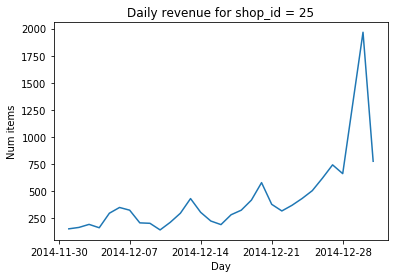

Current answer for task total_num_items_sold_var is: 117318.878161


In [54]:
shop_id = 25

total_num_items_sold = daily_sold['item_cnt_day_new'].values # YOUR CODE GOES HERE
days = daily_sold.index.values # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = daily_sold['item_cnt_day_new'].var() # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

### 1の方法で集計した場合

In [55]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00


In [56]:
# extract shop_id = 25 and December, 2014
data = transactions.set_index('date')
data = data[data['shop_id'] == 25]['2014-12']
data.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales
date,,,,,,
2014-12-14,23,25,21752,399.0,1.0,399.0
2014-12-13,23,25,21752,399.0,3.0,1197.0
2014-12-26,23,25,21733,149.0,1.0,149.0
2014-12-31,23,25,21732,149.0,1.0,149.0
2014-12-30,23,25,21726,149.0,1.0,149.0


In [60]:
res = pd.DataFrame(data.reset_index().groupby('date')['item_cnt_day'].sum())
res.head()

,item_cnt_day
date,
2014-12-01,153.0
2014-12-02,169.0
2014-12-03,195.0
2014-12-04,164.0
2014-12-05,300.0


In [61]:
res['item_cnt_day'].var()

117167.70229885059

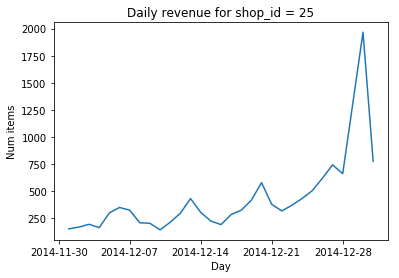

Current answer for task total_num_items_sold_var is: 117167.702299


In [62]:
shop_id = 25

total_num_items_sold = res['item_cnt_day'].values # YOUR CODE GOES HERE
days = res.index.values # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = res['item_cnt_day'].var() # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [63]:
STUDENT_EMAIL = 'kuze3110@gmail.com' # EMAIL HERE
STUDENT_TOKEN = 'EB7iHBDN4kSByZVU'# TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [64]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)